In [52]:
import numpy as np
import networkx as nx
import dimod
import dwave_networkx as dnx

from dimod.binary_quadratic_model import BinaryQuadraticModel
from dwave.system.composites import EmbeddingComposite

import matplotlib.pyplot as plt
# magic word for producing visulizations in notebook
%matplotlib inline
from collections import defaultdict
import itertools
import pandas as pd
import seaborn as sns


from dwave.system.samplers import DWaveSampler

In [34]:

def import_city_coordinates(filename):
  """Imports a list of city coordinates from a file.

  Args:
    filename: The name of the file containing the city coordinates.

  Returns:
    A NumPy array containing the city coordinates.
  """

  city_coordinates = []
  with open(filename, 'r') as f:
    for line in f:
      x, y = line.split()
      x = float(x)
      y = float(y)
      city_coordinates.append([x, y])

  return np.array(city_coordinates)

city_coordinates = import_city_coordinates('5_cities_coordinates.txt')

city_coordinates



array([[ 10.,  10.],
       [ 50.,  15.],
       [100.,  90.],
       [ 60.,  80.],
       [ 10.,  85.]])

In [18]:
def calculate_distance(city1, city2):
  """Calculates the distance between two cities.

  Args:
    city1: A list containing the coordinates of the first city.
    city2: A list containing the coordinates of the second city.

  Returns:
    The distance between the two cities in kilometers.
  """

  x1, y1 = city1
  x2, y2 = city2

  distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

  return distance

  

In [46]:
#print (city_coordinates)

city_coordinates = city_coordinates.reshape((len(city_coordinates), 2))
#city_coordinates = city_coordinates.flatten()


print (city_coordinates)
print (city_coordinates[0], city_coordinates[0])
distance = calculate_distance(city_coordinates[0], city_coordinates[0])

#print (distance)

# Create a list of city names
city_names = []
for i in range(len(city_coordinates)):
  city_names.append("city" + str(i + 1))

# Create a Pandas DataFrame to store the distances between the cities
df = pd.DataFrame(columns=city_names, index=city_names)

# Calculate the distance between each pair of cities and store the distance in the DataFrame
for i in range(len(city_names)):
  for j in range(len(city_names)):
    distance = calculate_distance(city_coordinates[i], city_coordinates[j])
    df.loc[city_names[i], city_names[j]] = distance

# Print the DataFrame
print(df)


[[ 10.  10.]
 [ 50.  15.]
 [100.  90.]
 [ 60.  80.]
 [ 10.  85.]]
[[ 10.  10.]
 [ 50.  15.]
 [100.  90.]
 [ 60.  80.]
 [ 10.  85.]]
[10. 10.] [10. 10.]
0.0
            city1      city2       city3      city4      city5
city1         0.0  40.311289  120.415946  86.023253       75.0
city2   40.311289        0.0   90.138782  65.764732  80.622577
city3  120.415946  90.138782         0.0  41.231056  90.138782
city4   86.023253  65.764732   41.231056        0.0  50.249378
city5        75.0  80.622577   90.138782  50.249378        0.0


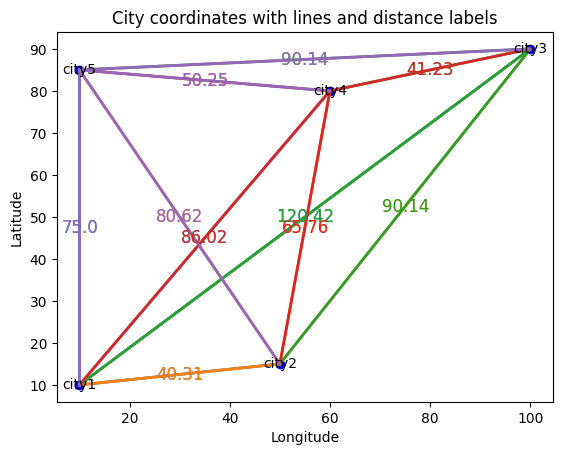

In [54]:
# Create a color list for the lines
palette = sns.color_palette("tab10", 10)

# Create a figure
fig, ax = plt.subplots()

# Plot the cities
ax.scatter(city_coordinates[:, 0], city_coordinates[:, 1], marker="o", color="blue")

# Add labels to the cities
for i in range(len(city_names)):
  ax.text(city_coordinates[i][0], city_coordinates[i][1], city_names[i], ha="center", va="center")

# Set the axis labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Set the title
ax.set_title("City coordinates with lines and distance labels")

# Plot the lines between the cities
for i in range(len(city_names)):
  for j in range(len(city_names)):
    if i != j:
      distance = df.loc[city_names[i], city_names[j]]
      ax.plot([city_coordinates[i][0], city_coordinates[j][0]], [city_coordinates[i][1], city_coordinates[j][1]], color=palette[i], linestyle="solid", linewidth=2)

      # Add distance labels to the lines
      midpoint = (city_coordinates[i] + city_coordinates[j]) / 2
      offset = (0.05, -0.05)
      ax.text(midpoint[0] + offset[0], midpoint[1] + offset[1], str(round(distance, 2)), ha="center", va="center", fontsize=12, color=palette[i])

# Show the plot
plt.show()

